In [28]:
from activ import load_data, data_normalization
import os
from activ.readfile import TrackTBIFile
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap, nmf_bases_heatmap, nmf_heatmap, nmf_boxplot
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file = '/Users/ahyeon/Desktop/activ/results/features_dropped/bm_features_dropped/single_dim/dim_2_bm_dropped_result_0.h5'

In [4]:
f = h5py.File(file, 'r')

In [12]:
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
labels = np.squeeze(f['clusters'][:], axis=1)
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:]

In [13]:
scale

array([2, 2])

In [15]:
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='euclidean')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)
mean.shape

(30381,)

In [16]:
numclusters = 14
labels = _sch.cut_tree(_sch.linkage(mean, method='ward'), numclusters)

In [17]:
labels

array([[ 0],
       [ 1],
       [ 2],
       [ 0],
       [ 3],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 5],
       [ 2],
       [ 7],
       [ 0],
       [ 5],
       [ 3],
       [ 0],
       [ 0],
       [ 5],
       [ 1],
       [ 3],
       [ 8],
       [ 3],
       [ 0],
       [ 8],
       [ 9],
       [10],
       [11],
       [ 8],
       [ 8],
       [ 5],
       [ 5],
       [ 1],
       [ 5],
       [ 8],
       [ 3],
       [ 8],
       [ 7],
       [ 5],
       [ 4],
       [ 8],
       [ 2],
       [ 5],
       [ 8],
       [ 5],
       [11],
       [ 8],
       [ 5],
       [ 4],
       [ 9],
       [11],
       [ 1],
       [ 0],
       [ 0],
       [ 5],
       [ 3],
       [ 7],
       [ 1],
       [ 5],
       [ 8],
       [ 5],
       [ 1],
       [ 8],
       [ 9],
       [ 1],
       [ 0],
       [ 1],
       [11],
       [ 7],
       [ 8],
       [ 5],
       [ 7],
       [ 1],
       [ 5],
       [ 6],
       [ 5],
       [ 6],
       [11],

In [20]:
nmf = load_data(uoinmf=True)

In [21]:
nmf_bm = nmfdata.biomarkers

In [34]:
logreg = LogisticRegression()
y_pred = logreg.fit(nmf_bm, labels).coef_

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: 'NoneType' object is not iterable

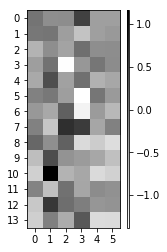

In [39]:
heatmap(y_pred, row_labels= None, col_labels = None)